In [49]:
from copy import deepcopy
from scipy.spatial import distance 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']= (16,9)
plt.style.use('ggplot')


In [2]:
#importing daata set
data= pd.read_csv('Data dummy.csv')
print(data.shape)
data.head()

(23, 4)


,Nama Produk,Jumlah Stok,Stok Keluar,Keuntungan
0,Habbatussauda Extra Propolis Trigon,109,41,54.166667
1,Habbatussauda Oil 200 Kapsul,99,16,55.000000
2,Habasyi Oil 100 Kps,85,16,50.000000
3,Habasyi Oil 210 Kps,81,18,50.000000
4,Kapsul Habbatus Sauda,81,30,58.333333


In [3]:
f1= data['Jumlah Stok'].values
f2= data['Stok Keluar'].values
f3= data['Keuntungan'].values
X = np.array(list(zip(f1,f2,f3)))
print(X)

[[109.          41.          54.16666667]
 [ 99.          16.          55.        ]
 [ 85.          16.          50.        ]
 [ 81.          18.          50.        ]
 [ 81.          30.          58.33333333]
 [ 83.          49.          57.14285714]
 [113.          32.          42.85714286]
 [110.          20.          50.        ]
 [106.          38.          50.        ]
 [ 99.          42.          54.54545455]
 [ 89.          42.          50.        ]
 [ 92.          50.          52.        ]
 [ 89.          36.          54.54545455]
 [101.          37.          52.        ]
 [102.          47.          55.        ]
 [ 87.          22.          50.        ]
 [ 83.          41.          55.        ]
 [107.          43.          55.55555556]
 [ 87.          43.          46.15384615]
 [100.          18.          53.84615385]
 [ 92.          42.          52.94117647]
 [112.          49.          47.91666667]
 [117.          18.          52.        ]]


In [50]:
#Euclidean Distance
def euclidian(a, b):
    return distance.euclidean(a,b)

In [65]:
k=3
C_w = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size=k)
C_x = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size=k)
C_y = np.random.randint(np.min(X[:,2]), np.max(X[:,2]), size=k)
C= np.array(list(zip(C_w,C_x,C_y)), dtype=np.float32)
C

array([[ 94.,  23.,  46.],
       [115.,  35.,  56.],
       [ 95.,  19.,  46.]], dtype=float32)

In [66]:
C_old=np.zeros((C.shape))
#label
clusters = np.zeros(len(X))
error = dist(C,C_old, None)
counter=1
print(X)
while counter <100:
    print("C")
    print(C)
    for i in range(len(X)):
        distance=dist(X[i],C)
        print("dist")
        print(distance)
        cluster = np.argmin(distance)
        print("cluster")
        print(cluster)
        clusters[i] = cluster
    #storing old centroid
    C_old=deepcopy(C)
    #finding the new centroid
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        print("points")
        print(points)
        C[i]=np.mean(points,axis=0)
        print(C[i])
    error = dist(C,C_old,None)
    counter+=1

[[109.          41.          54.16666667]
 [ 99.          16.          55.        ]
 [ 85.          16.          50.        ]
 [ 81.          18.          50.        ]
 [ 81.          30.          58.33333333]
 [ 83.          49.          57.14285714]
 [113.          32.          42.85714286]
 [110.          20.          50.        ]
 [106.          38.          50.        ]
 [ 99.          42.          54.54545455]
 [ 89.          42.          50.        ]
 [ 92.          50.          52.        ]
 [ 89.          36.          54.54545455]
 [101.          37.          52.        ]
 [102.          47.          55.        ]
 [ 87.          22.          50.        ]
 [ 83.          41.          55.        ]
 [107.          43.          55.55555556]
 [ 87.          43.          46.15384615]
 [100.          18.          53.84615385]
 [ 92.          42.          52.94117647]
 [112.          49.          47.91666667]
 [117.          18.          52.        ]]
C
[[ 94.  23.  46.]
 [115.  35.  

cluster
0
dist
[29.61343357 14.32898701 22.79556563]
cluster
1
dist
[31.73796041 21.5301377  13.20377097]
cluster
2
dist
[19.6162721   3.47085427 21.72679967]
cluster
1
dist
[12.07399087  7.79579976 23.98631593]
cluster
1
dist
[ 3.84683389 17.2132748  25.07524882]
cluster
0
dist
[ 9.83563911 16.68910102 32.10917099]
cluster
0
dist
[ 6.10583781 18.13213981 19.66651807]
cluster
0
dist
[14.79830384  6.59743077 19.14229491]
cluster
1
dist
[16.02817192  7.98404582 29.34989698]
cluster
1
dist
[19.89467595 27.08868453 10.77945766]
cluster
2
dist
[ 4.40480364 23.38792397 26.90436831]
cluster
0
dist
[20.17769009  4.54826982 26.96005861]
cluster
1
dist
[ 7.24245896 19.94788381 27.20125765]
cluster
0
dist
[26.97181583 24.03666759  3.78899486]
cluster
2
dist
[ 5.02446188 14.22474337 24.27558879]
cluster
0
dist
[26.60809727 10.45986175 34.37389141]
cluster
1
dist
[38.20654128 25.55926628 20.00711445]
cluster
2
points
[array([81.        , 30.        , 58.33333333]), array([83.        , 49.        , 

2
dist
[19.6162721   3.47085427 21.72679967]
cluster
1
dist
[12.07399087  7.79579976 23.98631593]
cluster
1
dist
[ 3.84683389 17.2132748  25.07524882]
cluster
0
dist
[ 9.83563911 16.68910102 32.10917099]
cluster
0
dist
[ 6.10583781 18.13213981 19.66651807]
cluster
0
dist
[14.79830384  6.59743077 19.14229491]
cluster
1
dist
[16.02817192  7.98404582 29.34989698]
cluster
1
dist
[19.89467595 27.08868453 10.77945766]
cluster
2
dist
[ 4.40480364 23.38792397 26.90436831]
cluster
0
dist
[20.17769009  4.54826982 26.96005861]
cluster
1
dist
[ 7.24245896 19.94788381 27.20125765]
cluster
0
dist
[26.97181583 24.03666759  3.78899486]
cluster
2
dist
[ 5.02446188 14.22474337 24.27558879]
cluster
0
dist
[26.60809727 10.45986175 34.37389141]
cluster
1
dist
[38.20654128 25.55926628 20.00711445]
cluster
2
points
[array([81.        , 30.        , 58.33333333]), array([83.        , 49.        , 57.14285714]), array([89., 42., 50.]), array([92., 50., 52.]), array([89.        , 36.        , 54.54545455]), arr

[14.79830384  6.59743077 19.14229491]
cluster
1
dist
[16.02817192  7.98404582 29.34989698]
cluster
1
dist
[19.89467595 27.08868453 10.77945766]
cluster
2
dist
[ 4.40480364 23.38792397 26.90436831]
cluster
0
dist
[20.17769009  4.54826982 26.96005861]
cluster
1
dist
[ 7.24245896 19.94788381 27.20125765]
cluster
0
dist
[26.97181583 24.03666759  3.78899486]
cluster
2
dist
[ 5.02446188 14.22474337 24.27558879]
cluster
0
dist
[26.60809727 10.45986175 34.37389141]
cluster
1
dist
[38.20654128 25.55926628 20.00711445]
cluster
2
points
[array([81.        , 30.        , 58.33333333]), array([83.        , 49.        , 57.14285714]), array([89., 42., 50.]), array([92., 50., 52.]), array([89.        , 36.        , 54.54545455]), array([83., 41., 55.]), array([87.        , 43.        , 46.15384615]), array([92.        , 42.        , 52.94117647])]
[87.       41.625    53.264584]
points
[array([109.        ,  41.        ,  54.16666667]), array([113.        ,  32.        ,  42.85714286]), array([106., 

dist
[38.20654128 25.55926628 20.00711445]
cluster
2
points
[array([81.        , 30.        , 58.33333333]), array([83.        , 49.        , 57.14285714]), array([89., 42., 50.]), array([92., 50., 52.]), array([89.        , 36.        , 54.54545455]), array([83., 41., 55.]), array([87.        , 43.        , 46.15384615]), array([92.        , 42.        , 52.94117647])]
[87.       41.625    53.264584]
points
[array([109.        ,  41.        ,  54.16666667]), array([113.        ,  32.        ,  42.85714286]), array([106.,  38.,  50.]), array([99.        , 42.        , 54.54545455]), array([101.,  37.,  52.]), array([102.,  47.,  55.]), array([107.        ,  43.        ,  55.55555556]), array([112.        ,  49.        ,  47.91666667])]
[106.125     41.125     51.505184]
points
[array([99., 16., 55.]), array([85., 16., 50.]), array([81., 18., 50.]), array([110.,  20.,  50.]), array([87., 22., 50.]), array([100.        ,  18.        ,  53.84615385]), array([117.,  18.,  52.])]
[97.      

[106.125     41.125     51.505184]
points
[array([99., 16., 55.]), array([85., 16., 50.]), array([81., 18., 50.]), array([110.,  20.,  50.]), array([87., 22., 50.]), array([100.        ,  18.        ,  53.84615385]), array([117.,  18.,  52.])]
[97.       18.285715 51.54945 ]
C
[[ 87.        41.625     53.264584]
 [106.125     41.125     51.505184]
 [ 97.        18.285715  51.54945 ]]
dist
[22.02735524  3.91978814 25.82224936]
cluster
1
dist
[28.34876179 26.34852914  4.59682384]
cluster
2
dist
[25.90942166 32.86026216 12.31362207]
cluster
2
dist
[24.59264384 34.18035736 16.07738872]
cluster
2
dist
[14.02971308 28.3135104  20.95818563]
cluster
0
dist
[ 9.24292328 25.07119077 34.21481406]
cluster
0
dist
[29.61343357 14.32898701 22.79556563]
cluster
1
dist
[31.73796041 21.5301377  13.20377097]
cluster
2
dist
[19.6162721   3.47085427 21.72679967]
cluster
1
dist
[12.07399087  7.79579976 23.98631593]
cluster
1
dist
[ 3.84683389 17.2132748  25.07524882]
cluster
0
dist
[ 9.83563911 16.68910102 

cluster
0
dist
[ 9.83563911 16.68910102 32.10917099]
cluster
0
dist
[ 6.10583781 18.13213981 19.66651807]
cluster
0
dist
[14.79830384  6.59743077 19.14229491]
cluster
1
dist
[16.02817192  7.98404582 29.34989698]
cluster
1
dist
[19.89467595 27.08868453 10.77945766]
cluster
2
dist
[ 4.40480364 23.38792397 26.90436831]
cluster
0
dist
[20.17769009  4.54826982 26.96005861]
cluster
1
dist
[ 7.24245896 19.94788381 27.20125765]
cluster
0
dist
[26.97181583 24.03666759  3.78899486]
cluster
2
dist
[ 5.02446188 14.22474337 24.27558879]
cluster
0
dist
[26.60809727 10.45986175 34.37389141]
cluster
1
dist
[38.20654128 25.55926628 20.00711445]
cluster
2
points
[array([81.        , 30.        , 58.33333333]), array([83.        , 49.        , 57.14285714]), array([89., 42., 50.]), array([92., 50., 52.]), array([89.        , 36.        , 54.54545455]), array([83., 41., 55.]), array([87.        , 43.        , 46.15384615]), array([92.        , 42.        , 52.94117647])]
[87.       41.625    53.264584]
po

[106.125     41.125     51.505184]
points
[array([99., 16., 55.]), array([85., 16., 50.]), array([81., 18., 50.]), array([110.,  20.,  50.]), array([87., 22., 50.]), array([100.        ,  18.        ,  53.84615385]), array([117.,  18.,  52.])]
[97.       18.285715 51.54945 ]
C
[[ 87.        41.625     53.264584]
 [106.125     41.125     51.505184]
 [ 97.        18.285715  51.54945 ]]
dist
[22.02735524  3.91978814 25.82224936]
cluster
1
dist
[28.34876179 26.34852914  4.59682384]
cluster
2
dist
[25.90942166 32.86026216 12.31362207]
cluster
2
dist
[24.59264384 34.18035736 16.07738872]
cluster
2
dist
[14.02971308 28.3135104  20.95818563]
cluster
0
dist
[ 9.24292328 25.07119077 34.21481406]
cluster
0
dist
[29.61343357 14.32898701 22.79556563]
cluster
1
dist
[31.73796041 21.5301377  13.20377097]
cluster
2
dist
[19.6162721   3.47085427 21.72679967]
cluster
1
dist
[12.07399087  7.79579976 23.98631593]
cluster
1
dist
[ 3.84683389 17.2132748  25.07524882]
cluster
0
dist
[ 9.83563911 16.68910102 

[97.       18.285715 51.54945 ]
C
[[ 87.        41.625     53.264584]
 [106.125     41.125     51.505184]
 [ 97.        18.285715  51.54945 ]]
dist
[22.02735524  3.91978814 25.82224936]
cluster
1
dist
[28.34876179 26.34852914  4.59682384]
cluster
2
dist
[25.90942166 32.86026216 12.31362207]
cluster
2
dist
[24.59264384 34.18035736 16.07738872]
cluster
2
dist
[14.02971308 28.3135104  20.95818563]
cluster
0
dist
[ 9.24292328 25.07119077 34.21481406]
cluster
0
dist
[29.61343357 14.32898701 22.79556563]
cluster
1
dist
[31.73796041 21.5301377  13.20377097]
cluster
2
dist
[19.6162721   3.47085427 21.72679967]
cluster
1
dist
[12.07399087  7.79579976 23.98631593]
cluster
1
dist
[ 3.84683389 17.2132748  25.07524882]
cluster
0
dist
[ 9.83563911 16.68910102 32.10917099]
cluster
0
dist
[ 6.10583781 18.13213981 19.66651807]
cluster
0
dist
[14.79830384  6.59743077 19.14229491]
cluster
1
dist
[16.02817192  7.98404582 29.34989698]
cluster
1
dist
[19.89467595 27.08868453 10.77945766]
cluster
2
dist
[ 4.

[20.17769009  4.54826982 26.96005861]
cluster
1
dist
[ 7.24245896 19.94788381 27.20125765]
cluster
0
dist
[26.97181583 24.03666759  3.78899486]
cluster
2
dist
[ 5.02446188 14.22474337 24.27558879]
cluster
0
dist
[26.60809727 10.45986175 34.37389141]
cluster
1
dist
[38.20654128 25.55926628 20.00711445]
cluster
2
points
[array([81.        , 30.        , 58.33333333]), array([83.        , 49.        , 57.14285714]), array([89., 42., 50.]), array([92., 50., 52.]), array([89.        , 36.        , 54.54545455]), array([83., 41., 55.]), array([87.        , 43.        , 46.15384615]), array([92.        , 42.        , 52.94117647])]
[87.       41.625    53.264584]
points
[array([109.        ,  41.        ,  54.16666667]), array([113.        ,  32.        ,  42.85714286]), array([106.,  38.,  50.]), array([99.        , 42.        , 54.54545455]), array([101.,  37.,  52.]), array([102.,  47.,  55.]), array([107.        ,  43.        ,  55.55555556]), array([112.        ,  49.        ,  47.916666

cluster
0
dist
[ 6.10583781 18.13213981 19.66651807]
cluster
0
dist
[14.79830384  6.59743077 19.14229491]
cluster
1
dist
[16.02817192  7.98404582 29.34989698]
cluster
1
dist
[19.89467595 27.08868453 10.77945766]
cluster
2
dist
[ 4.40480364 23.38792397 26.90436831]
cluster
0
dist
[20.17769009  4.54826982 26.96005861]
cluster
1
dist
[ 7.24245896 19.94788381 27.20125765]
cluster
0
dist
[26.97181583 24.03666759  3.78899486]
cluster
2
dist
[ 5.02446188 14.22474337 24.27558879]
cluster
0
dist
[26.60809727 10.45986175 34.37389141]
cluster
1
dist
[38.20654128 25.55926628 20.00711445]
cluster
2
points
[array([81.        , 30.        , 58.33333333]), array([83.        , 49.        , 57.14285714]), array([89., 42., 50.]), array([92., 50., 52.]), array([89.        , 36.        , 54.54545455]), array([83., 41., 55.]), array([87.        , 43.        , 46.15384615]), array([92.        , 42.        , 52.94117647])]
[87.       41.625    53.264584]
points
[array([109.        ,  41.        ,  54.16666667

C
[[ 87.        41.625     53.264584]
 [106.125     41.125     51.505184]
 [ 97.        18.285715  51.54945 ]]
dist
[22.02735524  3.91978814 25.82224936]
cluster
1
dist
[28.34876179 26.34852914  4.59682384]
cluster
2
dist
[25.90942166 32.86026216 12.31362207]
cluster
2
dist
[24.59264384 34.18035736 16.07738872]
cluster
2
dist
[14.02971308 28.3135104  20.95818563]
cluster
0
dist
[ 9.24292328 25.07119077 34.21481406]
cluster
0
dist
[29.61343357 14.32898701 22.79556563]
cluster
1
dist
[31.73796041 21.5301377  13.20377097]
cluster
2
dist
[19.6162721   3.47085427 21.72679967]
cluster
1
dist
[12.07399087  7.79579976 23.98631593]
cluster
1
dist
[ 3.84683389 17.2132748  25.07524882]
cluster
0
dist
[ 9.83563911 16.68910102 32.10917099]
cluster
0
dist
[ 6.10583781 18.13213981 19.66651807]
cluster
0
dist
[14.79830384  6.59743077 19.14229491]
cluster
1
dist
[16.02817192  7.98404582 29.34989698]
cluster
1
dist
[19.89467595 27.08868453 10.77945766]
cluster
2
dist
[ 4.40480364 23.38792397 26.90436831

points
[array([109.        ,  41.        ,  54.16666667]), array([113.        ,  32.        ,  42.85714286]), array([106.,  38.,  50.]), array([99.        , 42.        , 54.54545455]), array([101.,  37.,  52.]), array([102.,  47.,  55.]), array([107.        ,  43.        ,  55.55555556]), array([112.        ,  49.        ,  47.91666667])]
[106.125     41.125     51.505184]
points
[array([99., 16., 55.]), array([85., 16., 50.]), array([81., 18., 50.]), array([110.,  20.,  50.]), array([87., 22., 50.]), array([100.        ,  18.        ,  53.84615385]), array([117.,  18.,  52.])]
[97.       18.285715 51.54945 ]
C
[[ 87.        41.625     53.264584]
 [106.125     41.125     51.505184]
 [ 97.        18.285715  51.54945 ]]
dist
[22.02735524  3.91978814 25.82224936]
cluster
1
dist
[28.34876179 26.34852914  4.59682384]
cluster
2
dist
[25.90942166 32.86026216 12.31362207]
cluster
2
dist
[24.59264384 34.18035736 16.07738872]
cluster
2
dist
[14.02971308 28.3135104  20.95818563]
cluster
0
dist
[ 

points
[array([109.        ,  41.        ,  54.16666667]), array([113.        ,  32.        ,  42.85714286]), array([106.,  38.,  50.]), array([99.        , 42.        , 54.54545455]), array([101.,  37.,  52.]), array([102.,  47.,  55.]), array([107.        ,  43.        ,  55.55555556]), array([112.        ,  49.        ,  47.91666667])]
[106.125     41.125     51.505184]
points
[array([99., 16., 55.]), array([85., 16., 50.]), array([81., 18., 50.]), array([110.,  20.,  50.]), array([87., 22., 50.]), array([100.        ,  18.        ,  53.84615385]), array([117.,  18.,  52.])]
[97.       18.285715 51.54945 ]


In [67]:
print(clusters)
C

[1. 2. 2. 2. 0. 0. 1. 2. 1. 1. 0. 0. 0. 1. 1. 2. 0. 1. 0. 2. 0. 1. 2.]


array([[ 87.      ,  41.625   ,  53.264584],
       [106.125   ,  41.125   ,  51.505184],
       [ 97.      ,  18.285715,  51.54945 ]], dtype=float32)

In [68]:
produk = data['Nama Produk']
new_data= np.array(list(zip(produk,clusters)))

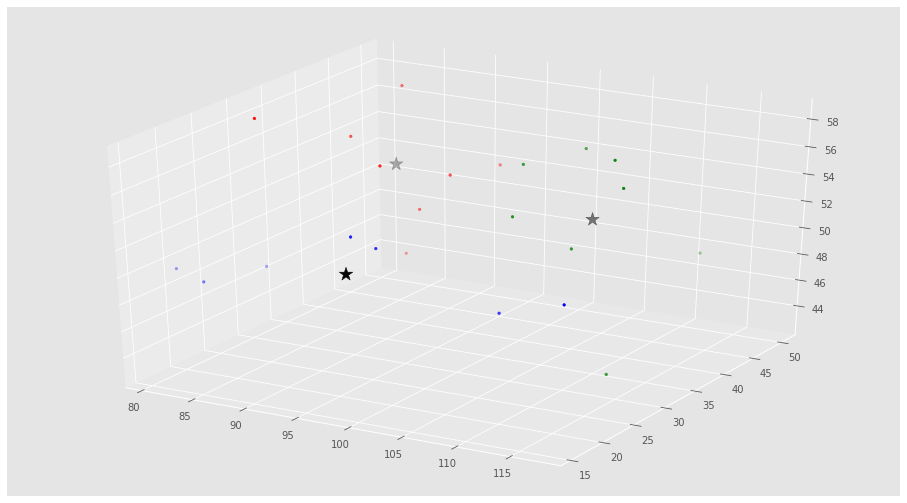

In [69]:
colors= ['r', 'g', 'b', 'y', 'c', 'm']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1],points[:, 2], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1],C[:, 2], marker='*', s=200, c='#050505')